## Final Project Submission

Please fill out:
* Student name: Brian Bentson
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


## Functions

In [269]:
pd.set_option('display.max_rows', 100)

### Function to Explore Table and Column Info

In [270]:
def get_info(table_name, column=None):
    if column == None:
        print(f'Table Name: {table_name}') 
        print('\n')
        print('Table Columns')
        print(tables[table_name].columns)
        print('\n')
        print('Table Info')
        print(tables[table_name].info())
        print('\n')
        print('Table Descriptive Statistics')
        print(tables[table_name].describe())
    else:
        print(f'Table Name: {table_name}') 
        print('\n')
        print('Table Columns')
        print(tables[table_name].columns)
        print('\n')
        print('Table Info')
        print(tables[table_name].info())
        print('\n')
        print(f'{column.title()} Descriptive Statistics')
        print(tables[table_name][column].describe())
        print('\n')
        print('Table Values')
        print(tables[table_name][column].value_counts(dropna=False))
        print('\n')
        print('Unique Values')
        print(tables[table_name][column].unique())

# Business Statement

Based on the suceess of their peers, Microsoft has decided to create a new movie studio focused on creating original video content. They have no direct movie creation experience and want to leverage historical movie data in order to determine what are leading indicators of a successful movie.

# Analysis Methodology

I will be analyzing historic movie data to find actionable insights for the head of Mircrosoft's new movie studio on how to create a successful introduction to the movie industry.

A movie's success can be judged by many factors centered around financial and social measures. Since it is imperative to start on a good footing when entering a new industry, I have decided to focus my analysis on the financial aspect of measuring success. This will mean that a successful historic movie will have a high relative return on investment. 

# Data Collection

Since I am choosing to judge movie success on the financial metric of return on investment (ROI), I need to gather the correct data in order to make that calculation. The following data will be gathered:
- Movie-specific meta-data
- Production Cost
- Global Revenue
<br>


I have 11 separate files which provide movie meta-data which will be helpful in the analysis. I will import them using pandas.

## Import Movie Data into Pandas

### Import Modules

In [271]:
#import relevant modules
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Preview All Files

In [272]:
files = glob.glob(f'../zippedData/*.[c,t]sv*')

tables = {}
dashes = '---'*25
    
for file in files:
    if 'csv' in file:
        table_name = file.replace('.csv.gz','').split('/')[-1].replace('.','_')
        tables[table_name] = pd.read_csv(file)
        print(dashes)
        print(f'Table Name: {table_name}')
        display(tables[table_name].head())
    else:    
        table_name = file.replace('.tsv.gz','').split('/')[-1].replace('.','_')
        tables[table_name] = pd.read_csv(file, delimiter='\t', encoding='latin-1')
        print(dashes)
        print(f'Table Name: {table_name}')
        display(tables[table_name].head())

rt_reviews = tables['rt_reviews']
rt_movie_info = tables['rt_movie_info']
tmdb_movies = tables['tmdb_movies']
tn_movie_budgets = tables['tn_movie_budgets']
imdb_title_basics = tables['imdb_title_basics']
imdb_title_ratings = tables['imdb_title_ratings']
imdb_name_basics = tables['imdb_name_basics']
imdb_title_principals = tables ['imdb_title_principals']
imdb_title_crew = tables['imdb_title_crew']
imdb_title_akas = tables['imdb_title_akas']

---------------------------------------------------------------------------
Table Name: imdb_title_crew


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


---------------------------------------------------------------------------
Table Name: tmdb_movies


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


---------------------------------------------------------------------------
Table Name: imdb_title_akas


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


---------------------------------------------------------------------------
Table Name: imdb_title_ratings


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


---------------------------------------------------------------------------
Table Name: imdb_name_basics


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


---------------------------------------------------------------------------
Table Name: rt_reviews


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


---------------------------------------------------------------------------
Table Name: imdb_title_basics


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


---------------------------------------------------------------------------
Table Name: rt_movie_info


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


---------------------------------------------------------------------------
Table Name: tn_movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


---------------------------------------------------------------------------
Table Name: bom_movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


---------------------------------------------------------------------------
Table Name: imdb_title_principals


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


# Data Cleaning

## Understanding Raw Data

In order to determine if the right information is present and how to join different tables together for my analysis, I first need to understand what each piece of data is and how it can be used. I will do some short data exploration to understand the data better and decide which data processing techniques to use. 

### Column Meanings for Each Table

**imdb_title_crew**
- **tconst**: Unique identifier for each movie (PRIMARY KEY)
- **directors**: Director code
- **writers**: Writer code

<br>**tmdb_movies**
- Unnamed: 0: Can be removed or set as index
- genre_id's: Genre code
- id: Unknown
- original_language: movie language
- original_title: movie title
- popularity: Unknown
- release_date: movie release date
- title: movie title
- vote_average: Unknown
- vote_count: Number of votes

<br>**imdb_title_akas**
- title_id: movie id
- ordering: Unknown
- title: movie title
- region: Country of origin
- language: movie language
- types: Unknown
- attributes: Unknown
- is_original_title: Unknown

<br>**imdb_title_ratings**
- tconst: Unknown
- **averagerating**: movie rating
- **numvotes**: Number of votes

<br>**imdb_name_basics**
- **nconst**: Unique identifier (PRIMARY KEY)
- **primary_name**: Name
- birth_year: Year born
- death_year: Year died
- **primary_profession**: Job Roles
- known_for_titles: title id's

<br>**rt_reviews**
- id: Unknown
- review: Review comments
- rating: Movie rating
- fresh: fresh or rotten score
- critic: Critic Name
- top_critic: Unknown
- publisher: Publisher Name
- date: Unknown

<br> **imdb_title_basics**
- tconst: Unknown
- primary_title: English Movie Name
- original_title: Native Movie Name
- start_year: Unknown
- runtime_minutes: Movie length in minutes
- genres: movie genre

<br>**rt_movie_info**
- id: Unknown
- synopsis: Movie synopsis
- **rating**: movie parental rating
- **genre**: Movie genre
- **director**: Movie director
- **writer**: Movie writer
- **theater_date**: Theater release data
- dvd_date: DVD release date
- currency: Currency type
- box_office: Unknown
- **run_time**: Movie length
- studio: Movie Production Studio

<br>**tn_movie_budgets**
- id: Unknown
- release_date: Movie release date
- movie: Movie title
- **production_budget**: Movie production budget in USD
- **domestic_gross**: Gross revenue domestically
- **worldwide_gross**: Gross revenue worldwide

<br>**bom_movie_gross**
- title: Movie title
- studio: Movie studio
- **domestic_gross**: Gross revenue domestically
- **foreign_gross**: Gross revenue worldwide
- year: Release year

<br>**imdb_title_principals**
- tconst: Unknown
- ordering: Unknown
- nconst: Unknown
- category: Job role
- job: Unknown
- characters:Unknown

### Entity Relationship Diagram (UPDATE)

![](movie_project_erd.png)

## Clean Up Tables for Joins

### tn_movie_budgets

In [273]:
#number of rows, columns and first 5 rows
display(tn_movie_budgets.shape,tn_movie_budgets.head())

(5782, 6)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


#### Remove Columns

In [274]:
#removing id because it doesn't like up with any other id's in other tables
tn_movie_budgets = tn_movie_budgets.drop('id',axis=1)
tn_movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


#### Convert Values

In [275]:
#converting release_date to datetime object to be able to extract the year for future joins
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'])
tn_movie_budgets['start_year'] = tn_movie_budgets['release_date'].dt.year
tn_movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,start_year
0,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017


In [276]:
#convert financial fields into integers for future calculations
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace('$','').str.replace(',','').astype('int')
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace('$','').str.replace(',','').astype('int')
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace('$','').str.replace(',','').astype('int')
tn_movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,start_year
0,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


#### Check for Duplicates

In [277]:
#check for any duplicates for the combination of movie and release_date because
#those are going to the be the primary keys for future joins
tn_movie_budgets.loc[tn_movie_budgets.duplicated(subset=['movie','start_year'], keep=False)]

,release_date,movie,production_budget,domestic_gross,worldwide_gross,start_year
3455,2009-06-05,Home,12000000,0,0,2009
5459,2009-04-23,Home,500000,15433,44793168,2009


1 duplicate found. Both will be removed during innner join with imdb_title_basics because they are prior to 2010.

#### Final Table View

In [278]:
tn_movie_budgets

,release_date,movie,production_budget,domestic_gross,worldwide_gross,start_year
0,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
...,...,...,...,...,...,...
5777,2018-12-31,Red 11,7000,0,0,2018
5778,1999-04-02,Following,6000,48482,240495,1999
5779,2005-07-13,Return to the Land of Wonders,5000,1338,1338,2005
5780,2015-09-29,A Plague So Pleasant,1400,0,0,2015


### imdb_title_basics

In [279]:
#number of rows, columns and first 5 rows
display(imdb_title_basics.shape,imdb_title_basics.head())

(146144, 6)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


#### Remove Columns

In [280]:
#remove original_title because primary_title looks to be most accurate
imdb_title_basics = imdb_title_basics.drop('original_title',axis=1)
imdb_title_basics.head()

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


#### Check for Duplicates

In [281]:
#check for any duplicates for the combination of primary_title and start_year
imdb_title_basics.loc[imdb_title_basics.duplicated(subset=['primary_title','start_year'], keep=False)]

,tconst,primary_title,start_year,runtime_minutes,genres
21,tt0250404,Godfather,2012,NaN,"Crime,Drama"
117,tt0443465,Before We Go,2014,95.0,"Comedy,Drama,Romance"
133,tt0452664,Party Crashers,2012,88.0,Comedy
211,tt0490075,Aftermath,2013,84.0,"Crime,Thriller"
276,tt0800054,The Guardians,2010,88.0,"Comedy,Family"
...,...,...,...,...,...
145919,tt9886934,The Projectionist,2019,81.0,Documentary
145937,tt9889072,The Promise,2017,NaN,Drama
146068,tt9905256,The Cross,2012,NaN,Thriller
146119,tt9913594,Bacchanalia,2017,72.0,"Drama,Mystery,Thriller"


Because there are almost 4000 duplicates, I will use the imdb_title_akas table to remove duplicates by ensuring imdb_title_basics holds only original titles

#### Final Table View

In [282]:
imdb_title_basics

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,2017,116.0,NaN


### imdb_title_akas

In [209]:
#number of rows, columns and first 5 rows
display(imdb_title_akas.shape,imdb_title_akas.head())

(44700, 4)

,title_id,title,region,is_original_title
38,tt0369610,Jurassic World,NaN,1.0
80,tt0401729,John Carter,NaN,1.0
83,tt10010134,Versailles Rediscovered - The Sun King's Vanis...,NaN,1.0
86,tt10027708,Miguelito - Canto a Borinquen,NaN,1.0
90,tt10050722,Thing I Don't Get,NaN,1.0


#### Remove Columns

In [283]:
#remove unnecessary columns for future joins
imdb_title_akas = imdb_title_akas.drop(['ordering','language','types','attributes','region'],axis=1)
imdb_title_akas.head()

,title_id,title,is_original_title
0,tt0369610,Джурасик свят,0.0
1,tt0369610,Jurashikku warudo,0.0
2,tt0369610,Jurassic World: O Mundo dos Dinossauros,0.0
3,tt0369610,O Mundo dos Dinossauros,0.0
4,tt0369610,Jurassic World,0.0


#### Check for Duplicates

In [284]:
#check for duplicates in title id
imdb_title_akas.loc[imdb_title_akas.duplicated(subset=['title_id'], keep=False)]

,title_id,title,is_original_title
0,tt0369610,Джурасик свят,0.0
1,tt0369610,Jurashikku warudo,0.0
2,tt0369610,Jurassic World: O Mundo dos Dinossauros,0.0
3,tt0369610,O Mundo dos Dinossauros,0.0
4,tt0369610,Jurassic World,0.0
...,...,...,...
331698,tt9827784,Sayonara kuchibiru,1.0
331699,tt9827784,Farewell Song,0.0
331700,tt9880178,La atención,1.0
331701,tt9880178,La atención,0.0


In [285]:
imdb_title_akas.loc[imdb_title_akas['title_id'] == 'tt0369610']

,title_id,title,is_original_title
0,tt0369610,Джурасик свят,0.0
1,tt0369610,Jurashikku warudo,0.0
2,tt0369610,Jurassic World: O Mundo dos Dinossauros,0.0
3,tt0369610,O Mundo dos Dinossauros,0.0
4,tt0369610,Jurassic World,0.0
5,tt0369610,Jurassic World,0.0
6,tt0369610,Jurassic World,0.0
7,tt0369610,Jurski svijet,0.0
8,tt0369610,Olam ha'Yura,0.0
9,tt0369610,Jurassic World: Mundo Jurásico,0.0


Many duplicates found. Removing all rows where the is_original_title is 0.0

In [286]:
#only keep rows where is_original_title equal 1 
imdb_title_akas = imdb_title_akas.loc[imdb_title_akas['is_original_title'] == 1]
imdb_title_akas

,title_id,title,is_original_title
38,tt0369610,Jurassic World,1.0
80,tt0401729,John Carter,1.0
83,tt10010134,Versailles Rediscovered - The Sun King's Vanis...,1.0
86,tt10027708,Miguelito - Canto a Borinquen,1.0
90,tt10050722,Thing I Don't Get,1.0
...,...,...,...
331690,tt9723084,Anderswo. Allein in Afrika,1.0
331692,tt9726638,Monkey King: The Volcano,1.0
331696,tt9755806,Big Shark,1.0
331698,tt9827784,Sayonara kuchibiru,1.0


In [287]:
#recheck for duplicates
imdb_title_akas.loc[imdb_title_akas.duplicated(subset=['title_id'], keep=False)]

,title_id,title,is_original_title
19255,tt1226736,Against the Wind,1.0
19256,tt1226736,Alexander Jamieson,1.0
23989,tt2392386,The Sugar Wars: The Life Story of Angelo Lonardo,1.0
23990,tt2392386,Sugar Wars - The Rise of the Cleveland Mafia,1.0
33369,tt1754830,Being Us,1.0
33372,tt1754830,Us,1.0
37514,tt2445698,Entre Nós,1.0
37517,tt2445698,A Pele do Cordeiro,1.0
42571,tt2219210,Crawl Bitch Crawl,1.0
42574,tt2219210,Crawl or Die,1.0


In [288]:
#example check
imdb_title_akas.loc[imdb_title_akas['title_id'] == 'tt2219210']

,title_id,title,is_original_title
42571,tt2219210,Crawl Bitch Crawl,1.0
42574,tt2219210,Crawl or Die,1.0


Still have a small number of duplicates. Will remove these rows now

In [289]:
#remove duplicates for rows with duplicate title_id
imdb_title_akas.drop_duplicates(subset=['title_id'], inplace=True)
imdb_title_akas

,title_id,title,is_original_title
38,tt0369610,Jurassic World,1.0
80,tt0401729,John Carter,1.0
83,tt10010134,Versailles Rediscovered - The Sun King's Vanis...,1.0
86,tt10027708,Miguelito - Canto a Borinquen,1.0
90,tt10050722,Thing I Don't Get,1.0
...,...,...,...
331690,tt9723084,Anderswo. Allein in Afrika,1.0
331692,tt9726638,Monkey King: The Volcano,1.0
331696,tt9755806,Big Shark,1.0
331698,tt9827784,Sayonara kuchibiru,1.0


In [290]:
#recheck for duplicates
imdb_title_akas.loc[imdb_title_akas.duplicated(subset=['title_id'], keep=False)]

,title_id,title,is_original_title


No more duplicate title_id's

#### Final Table View

In [291]:
imdb_title_akas

,title_id,title,is_original_title
38,tt0369610,Jurassic World,1.0
80,tt0401729,John Carter,1.0
83,tt10010134,Versailles Rediscovered - The Sun King's Vanis...,1.0
86,tt10027708,Miguelito - Canto a Borinquen,1.0
90,tt10050722,Thing I Don't Get,1.0
...,...,...,...
331690,tt9723084,Anderswo. Allein in Afrika,1.0
331692,tt9726638,Monkey King: The Volcano,1.0
331696,tt9755806,Big Shark,1.0
331698,tt9827784,Sayonara kuchibiru,1.0


## Joining Tables

I will be joining the tables in the following order:
- imdb_title_basics
- imdb_title_akas
- tn_movie_budgets
- imdb_title_ratings
- imdb_title_principals
- imdb_title_crew
- imdb_name_basics (TBD)

### Join imdb_title_basics and imdb_title_akas

I am starting with this join because there are many duplicate primary_titles in the imdb_title_basics table. I will use the is_original_title field to filter down the titles before joining to imdb_title_basics. This will ensure that when I join with tn_movie_budgets that I am not applying financials to the wrong movies with identical names.

I will be joining these tables on:
- imdb_title_basics: tconst
- imdb_title_akas: title_id

In [292]:
#review the shape of the dataframes prior to join
display(imdb_title_basics.shape, imdb_title_akas.shape)

(146144, 5)

(44653, 3)

#### Join the tables

In [188]:
movies_df = imdb_title_basics.merge(imdb_title_akas,how='inner',left_on=['tconst'], right_on=['title_id'])
movies_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_id,title,region,is_original_title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,Sunghursh,NaN,1.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,Ashad Ka Ek Din,NaN,1.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,The Other Side of the Wind,NaN,1.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,Sabse Bada Sukh,NaN,1.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,La Telenovela Errante,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...
44695,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,tt9911774,Padmavyuhathile Abhimanyu,NaN,1.0
44696,tt9913248,Nepal - Homebird,Nepal - Homebird,2019,52.0,Documentary,tt9913248,Nepal - Homebird,NaN,1.0
44697,tt9914254,A Cherry Tale,Kirsebæreventyret,2019,85.0,Documentary,tt9914254,Kirsebæreventyret,NaN,1.0
44698,tt9915436,Vida em Movimento,Vida em Movimento,2019,70.0,Documentary,tt9915436,Vida em Movimento,NaN,1.0


#### Check for Duplicates

In [310]:
#check for duplicates in the primary_title field
movies_df.loc[movies_df.duplicated(subset=(['tconst']))]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_id,title,region,is_original_title
32,tt0339736,The Evil Within,The Evil Within,2017,98.0,Horror,tt0339736,The Evil Within,NaN,1.0
1227,tt1226736,Alexander Jamieson,Alexander Jamieson,2017,135.0,"Adventure,Drama",tt1226736,Alexander Jamieson,NaN,1.0
1500,tt1288367,We Will Rock You,Operation Belvis Bash,2011,85.0,"Comedy,Music,Romance",tt1288367,Zero Dark Dirty,NaN,1.0
1501,tt1288367,We Will Rock You,Operation Belvis Bash,2011,85.0,"Comedy,Music,Romance",tt1288367,Operation Belvis Bash,NaN,1.0
2239,tt1430116,Hellgate,Hellgate,2011,93.0,"Fantasy,Horror,Thriller",tt1430116,Hellgate,NaN,1.0
3340,tt1564563,Half Empty,Half Empty,2011,103.0,Drama,tt1564563,Fantastic Confabulations,NaN,1.0
5071,tt1683481,Neighborhood Deal,Neighborhood Deal,2010,83.0,Drama,tt1683481,Reel Life,NaN,1.0
6278,tt1754830,Being Us,Being Us,2013,106.0,Drama,tt1754830,Us,NaN,1.0
6877,tt1796453,The Sheffield Affair,The Sheffield Affair,2010,63.0,Comedy,tt1796453,Destination Bumrape,NaN,1.0
7434,tt1833802,Don't Shout Too Loud,Don't Shout Too Loud,2011,50.0,"Documentary,Drama,News",tt1833802,Don't Shout Too Loud,NaN,1.0


47 duplicates for tconst

In [358]:
movies_df.loc[movies_df['tconst'] == 'tt8707008']

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_id,title,region,is_original_title
43110,tt8707008,The Viking War,The Viking War,2019,103.0,History,tt8707008,The Viking War,NaN,1.0
43111,tt8707008,The Viking War,The Viking War,2019,103.0,History,tt8707008,Berserker: Death Fields,NaN,1.0


#### Remove Duplicates

In [359]:
#delete some of the duplicates after manually reviewing
movies_df.drop([32,1226,1500,1501,2238,3340,5070,6278,6877,7433,7572,10150,
                12026,12792,14022,14049,14252,14402,14788,15646,16145,16855,
               17003,17384,17890,17905,18396,18611,19072,19073,19864,20462,
               21259,21870,22843,24549,26617,26634,27813,31341,31564,34063,
               35258,37100,38852,41980,43111], inplace=True)

In [360]:
#recheck for duplicates
movies_df.loc[movies_df.duplicated(subset=(['tconst']))]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_id,title,region,is_original_title


No more duplicates

#### Final Table View

In [365]:
movies_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_id,title,region,is_original_title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,Sunghursh,NaN,1.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,Ashad Ka Ek Din,NaN,1.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,The Other Side of the Wind,NaN,1.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,Sabse Bada Sukh,NaN,1.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,La Telenovela Errante,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...
44695,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,tt9911774,Padmavyuhathile Abhimanyu,NaN,1.0
44696,tt9913248,Nepal - Homebird,Nepal - Homebird,2019,52.0,Documentary,tt9913248,Nepal - Homebird,NaN,1.0
44697,tt9914254,A Cherry Tale,Kirsebæreventyret,2019,85.0,Documentary,tt9914254,Kirsebæreventyret,NaN,1.0
44698,tt9915436,Vida em Movimento,Vida em Movimento,2019,70.0,Documentary,tt9915436,Vida em Movimento,NaN,1.0


### Join movies_df and tn_movie_budgets

I will be joining these tables on:
- movies_df: [primary_title, start_year]
- tn_movie_budgets: [movie, start_year]

In [144]:
#review the shape of the dataframes prior to join
display(movies_df.shape, tn_movie_budgets.shape)

(44407, 9)

(5782, 6)

#### Join The Tables

In [366]:
#join tables together
movies_df = movies_df.merge(tn_movie_budgets, how='inner', 
                left_on=['primary_title','start_year'], 
                right_on=['movie','start_year'])
movies_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_id,title,region,is_original_title,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",tt0249516,Foodfight!,NaN,1.0,2012-12-31,Foodfight!,45000000,0,73706
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",tt0359950,The Secret Life of Walter Mitty,NaN,1.0,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",tt0365907,A Walk Among the Tombstones,NaN,1.0,2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",tt0369610,Jurassic World,NaN,1.0,2015-06-12,Jurassic World,215000000,652270625,1648854864
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",tt0376136,The Rum Diary,NaN,1.0,2011-10-28,The Rum Diary,45000000,13109815,21544732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,tt8155288,Happy Death Day 2U,Happy Death Day 2U,2019,100.0,"Drama,Horror,Mystery",tt8155288,Happy Death Day 2U,NaN,1.0,2019-02-13,Happy Death Day 2U,9000000,28051045,64179495
1447,tt8266310,Blinded by the Light,Blinded by the Light,2019,117.0,"Biography,Comedy,Drama",tt8266310,Blinded by the Light,NaN,1.0,2019-08-14,Blinded by the Light,15000000,0,0
1448,tt8364368,Crawl,Crawl,2019,NaN,"Action,Horror,Thriller",tt8364368,Crawl,NaN,1.0,2019-07-12,Crawl,17000000,0,0
1449,tt8632862,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,tt8632862,Fahrenheit 11/9,NaN,1.0,2018-09-21,Fahrenheit 11/9,5000000,6352306,6653715


#### Check for Duplicates

In [371]:
#check for duplicates
movies_df.loc[movies_df.duplicated(subset=['primary_title', 'start_year'],
                                   keep=False)]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_id,title,region,is_original_title,release_date,movie,production_budget,domestic_gross,worldwide_gross
156,tt1085492,The Prince,The Prince,2014,93.0,"Action,Thriller",tt1085492,The Prince,NaN,1.0,2014-08-22,The Prince,18000000,0,0
157,tt3918106,The Prince,Ksiaze,2014,71.0,NaN,tt3918106,Ksiaze,NaN,1.0,2014-08-22,The Prince,18000000,0,0
158,tt4161288,The Prince,Shah-zadeh,2014,92.0,Drama,tt4161288,Shah-zadeh,NaN,1.0,2014-08-22,The Prince,18000000,0,0
220,tt1216492,Leap Year,Leap Year,2010,100.0,"Comedy,Romance",tt1216492,Leap Year,NaN,1.0,2010-01-08,Leap Year,19000000,25918920,32618920
221,tt1537401,Leap Year,Año bisiesto,2010,94.0,"Drama,Romance",tt1537401,Año bisiesto,NaN,1.0,2010-01-08,Leap Year,19000000,25918920,32618920
314,tt1327709,Cyrus,Cyrus,2010,87.0,"Crime,Horror,Mystery",tt1327709,Cyrus,NaN,1.0,2010-06-18,Cyrus,7000000,7468936,10062896
315,tt1336617,Cyrus,Cyrus,2010,91.0,"Comedy,Drama,Romance",tt1336617,Cyrus,NaN,1.0,2010-06-18,Cyrus,7000000,7468936,10062896
476,tt1554091,A Better Life,A Better Life,2011,98.0,"Drama,Romance",tt1554091,A Better Life,NaN,1.0,2011-06-24,A Better Life,10000000,1759252,1884251
477,tt2027265,A Better Life,Une vie meilleure,2011,110.0,Drama,tt2027265,Une vie meilleure,NaN,1.0,2011-06-24,A Better Life,10000000,1759252,1884251
613,tt1693107,Highway,Hillbilly Highway,2012,77.0,Comedy,tt1693107,Hillbilly Highway,NaN,1.0,2012-12-31,Highway,2000000,0,0


In [373]:
#example check
movies_df.loc[movies_df['primary_title'] == 'The Prince']

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_id,title,region,is_original_title,release_date,movie,production_budget,domestic_gross,worldwide_gross
156,tt1085492,The Prince,The Prince,2014,93.0,"Action,Thriller",tt1085492,The Prince,NaN,1.0,2014-08-22,The Prince,18000000,0,0
157,tt3918106,The Prince,Ksiaze,2014,71.0,NaN,tt3918106,Ksiaze,NaN,1.0,2014-08-22,The Prince,18000000,0,0
158,tt4161288,The Prince,Shah-zadeh,2014,92.0,Drama,tt4161288,Shah-zadeh,NaN,1.0,2014-08-22,The Prince,18000000,0,0


#### Remove Duplicates

In [374]:
#remove 39 duplicates
movies_df.drop_duplicates(subset=['primary_title','start_year'],inplace=True)

In [377]:
#recheck the duplicates
movies_df.loc[movies_df.duplicated(subset=['primary_title', 'start_year'],
                                   keep=False)]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_id,title,region,is_original_title,release_date,movie,production_budget,domestic_gross,worldwide_gross


No duplicates for primary_title and start_year as well as tconst

#### Final Table View

In [378]:
movies_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_id,title,region,is_original_title,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",tt0249516,Foodfight!,NaN,1.0,2012-12-31,Foodfight!,45000000,0,73706
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",tt0359950,The Secret Life of Walter Mitty,NaN,1.0,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",tt0365907,A Walk Among the Tombstones,NaN,1.0,2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",tt0369610,Jurassic World,NaN,1.0,2015-06-12,Jurassic World,215000000,652270625,1648854864
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",tt0376136,The Rum Diary,NaN,1.0,2011-10-28,The Rum Diary,45000000,13109815,21544732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,tt8155288,Happy Death Day 2U,Happy Death Day 2U,2019,100.0,"Drama,Horror,Mystery",tt8155288,Happy Death Day 2U,NaN,1.0,2019-02-13,Happy Death Day 2U,9000000,28051045,64179495
1447,tt8266310,Blinded by the Light,Blinded by the Light,2019,117.0,"Biography,Comedy,Drama",tt8266310,Blinded by the Light,NaN,1.0,2019-08-14,Blinded by the Light,15000000,0,0
1448,tt8364368,Crawl,Crawl,2019,NaN,"Action,Horror,Thriller",tt8364368,Crawl,NaN,1.0,2019-07-12,Crawl,17000000,0,0
1449,tt8632862,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,tt8632862,Fahrenheit 11/9,NaN,1.0,2018-09-21,Fahrenheit 11/9,5000000,6352306,6653715


### Join movies_df and imdb_title_ratings

I will be joining these tables on:
- movies_df: [tconst]
- imdb_title_ratings: [tconst]

In [147]:
#review the shape of the dataframes prior to join
display(movies_df.shape, imdb_title_ratings.shape)

(1430, 14)

(73856, 3)

#### Join the Tables

In [379]:
#join tables together
movies_df = movies_df.merge(imdb_title_ratings, how='inner', on='tconst')
movies_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_id,title,region,is_original_title,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",tt0249516,Foodfight!,NaN,1.0,2012-12-31,Foodfight!,45000000,0,73706,1.9,8248
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",tt0359950,The Secret Life of Walter Mitty,NaN,1.0,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,7.3,275300
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",tt0365907,A Walk Among the Tombstones,NaN,1.0,2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,6.5,105116
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",tt0369610,Jurassic World,NaN,1.0,2015-06-12,Jurassic World,215000000,652270625,1648854864,7.0,539338
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",tt0376136,The Rum Diary,NaN,1.0,2011-10-28,The Rum Diary,45000000,13109815,21544732,6.2,94787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,tt8043306,Teefa in Trouble,Teefa in Trouble,2018,155.0,"Action,Comedy,Crime",tt8043306,Teefa in Trouble,NaN,1.0,2018-07-20,Teefa in Trouble,1500000,0,98806,7.4,2724
1416,tt8155288,Happy Death Day 2U,Happy Death Day 2U,2019,100.0,"Drama,Horror,Mystery",tt8155288,Happy Death Day 2U,NaN,1.0,2019-02-13,Happy Death Day 2U,9000000,28051045,64179495,6.3,27462
1417,tt8266310,Blinded by the Light,Blinded by the Light,2019,117.0,"Biography,Comedy,Drama",tt8266310,Blinded by the Light,NaN,1.0,2019-08-14,Blinded by the Light,15000000,0,0,6.2,173
1418,tt8632862,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,tt8632862,Fahrenheit 11/9,NaN,1.0,2018-09-21,Fahrenheit 11/9,5000000,6352306,6653715,6.7,11628


#### Final Table View

In [380]:
movies_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_id,title,region,is_original_title,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",tt0249516,Foodfight!,NaN,1.0,2012-12-31,Foodfight!,45000000,0,73706,1.9,8248
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",tt0359950,The Secret Life of Walter Mitty,NaN,1.0,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,7.3,275300
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",tt0365907,A Walk Among the Tombstones,NaN,1.0,2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,6.5,105116
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",tt0369610,Jurassic World,NaN,1.0,2015-06-12,Jurassic World,215000000,652270625,1648854864,7.0,539338
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",tt0376136,The Rum Diary,NaN,1.0,2011-10-28,The Rum Diary,45000000,13109815,21544732,6.2,94787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,tt8043306,Teefa in Trouble,Teefa in Trouble,2018,155.0,"Action,Comedy,Crime",tt8043306,Teefa in Trouble,NaN,1.0,2018-07-20,Teefa in Trouble,1500000,0,98806,7.4,2724
1416,tt8155288,Happy Death Day 2U,Happy Death Day 2U,2019,100.0,"Drama,Horror,Mystery",tt8155288,Happy Death Day 2U,NaN,1.0,2019-02-13,Happy Death Day 2U,9000000,28051045,64179495,6.3,27462
1417,tt8266310,Blinded by the Light,Blinded by the Light,2019,117.0,"Biography,Comedy,Drama",tt8266310,Blinded by the Light,NaN,1.0,2019-08-14,Blinded by the Light,15000000,0,0,6.2,173
1418,tt8632862,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,tt8632862,Fahrenheit 11/9,NaN,1.0,2018-09-21,Fahrenheit 11/9,5000000,6352306,6653715,6.7,11628


### Join movies_df and imdb_title_principals (not proceeding yet)

I will be joining these tables on:
- movies_df: [tconst]
- imdb_title_principals: [tconst]

In [384]:
#review the shape of the dataframes prior to join
display(movies_df.shape, imdb_title_principals.shape)

(1420, 17)

(1028186, 6)

**Question: How do I deal with the expansion of rows when trying to bring in directors and writers?**

## Post-Join Clean-Up of movies_df

It is now time to clean up the joined dataset in order to minimize noise in the data. This will include looking for:
<br>
- deleting columns
- deleting rows
- duplicates
- nulls 
- changing data types

In [151]:
movies_df

,tconst,primary_title,start_year,runtime_minutes,genres,title_id,title,region,is_original_title,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes
0,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",tt0249516,Foodfight!,NaN,1.0,2012-12-31,Foodfight!,45000000,0,73706,1.9,8248
1,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",tt0359950,The Secret Life of Walter Mitty,NaN,1.0,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,7.3,275300
2,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",tt0365907,A Walk Among the Tombstones,NaN,1.0,2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,6.5,105116
3,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",tt0369610,Jurassic World,NaN,1.0,2015-06-12,Jurassic World,215000000,652270625,1648854864,7.0,539338
4,tt0376136,The Rum Diary,2011,119.0,"Comedy,Drama",tt0376136,The Rum Diary,NaN,1.0,2011-10-28,The Rum Diary,45000000,13109815,21544732,6.2,94787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,tt8043306,Teefa in Trouble,2018,155.0,"Action,Comedy,Crime",tt8043306,Teefa in Trouble,NaN,1.0,2018-07-20,Teefa in Trouble,1500000,0,98806,7.4,2724
1416,tt8155288,Happy Death Day 2U,2019,100.0,"Drama,Horror,Mystery",tt8155288,Happy Death Day 2U,NaN,1.0,2019-02-13,Happy Death Day 2U,9000000,28051045,64179495,6.3,27462
1417,tt8266310,Blinded by the Light,2019,117.0,"Biography,Comedy,Drama",tt8266310,Blinded by the Light,NaN,1.0,2019-08-14,Blinded by the Light,15000000,0,0,6.2,173
1418,tt8632862,Fahrenheit 11/9,2018,128.0,Documentary,tt8632862,Fahrenheit 11/9,NaN,1.0,2018-09-21,Fahrenheit 11/9,5000000,6352306,6653715,6.7,11628


### Deleting Columns

In [390]:
#remove 
movies_df.drop(['primary_title','title_id','title','region','is_original_title'],axis=1, inplace=True)
movies_df

,tconst,original_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes
0,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",2012-12-31,Foodfight!,45000000,0,73706,1.9,8248
1,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,7.3,275300
2,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,6.5,105116
3,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",2015-06-12,Jurassic World,215000000,652270625,1648854864,7.0,539338
4,tt0376136,The Rum Diary,2011,119.0,"Comedy,Drama",2011-10-28,The Rum Diary,45000000,13109815,21544732,6.2,94787
...,...,...,...,...,...,...,...,...,...,...,...,...
1415,tt8043306,Teefa in Trouble,2018,155.0,"Action,Comedy,Crime",2018-07-20,Teefa in Trouble,1500000,0,98806,7.4,2724
1416,tt8155288,Happy Death Day 2U,2019,100.0,"Drama,Horror,Mystery",2019-02-13,Happy Death Day 2U,9000000,28051045,64179495,6.3,27462
1417,tt8266310,Blinded by the Light,2019,117.0,"Biography,Comedy,Drama",2019-08-14,Blinded by the Light,15000000,0,0,6.2,173
1418,tt8632862,Fahrenheit 11/9,2018,128.0,Documentary,2018-09-21,Fahrenheit 11/9,5000000,6352306,6653715,6.7,11628


### Deleting Rows

No rows to delete at the moment

QUESTION:Do higher ratings correlate with more revenue?
<br>
ANSWER: there is a weak positive correlation between average rating and domestic_gross

### Fixing Duplicates

In [395]:
#checking the number of duplicates in the dataframe
movies_df.duplicated().sum()

0

### Fixing Nulls

In [396]:
#checking the number of null values in each column
movies_df.isna().sum()

tconst               0
original_title       0
start_year           0
runtime_minutes      0
genres               0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
averagerating        0
numvotes             0
dtype: int64

In [435]:
#checking for zeros
movies_df.loc[(movies_df['domestic_gross'] == 0) & (movies_df['worldwide_gross'] == 0)].count()

tconst               81
original_title       81
start_year           81
runtime_minutes      81
genres               81
release_date         81
movie                81
production_budget    81
domestic_gross       81
worldwide_gross      81
averagerating        81
numvotes             81
roi                  81
dtype: int64

There are 81 movies with domestic_gross and worldwide_gross equal to zero. These should be removed.

In [443]:
movies_df.drop(movies_df.loc[(movies_df['domestic_gross'] == 0) & (movies_df['worldwide_gross'] == 0)].index, inplace=True)

### Changing Data Types

In [398]:
#checking the current data types of all columns
display(movies_df.info(),movies_df.head(2))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420 entries, 0 to 1419
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   tconst             1420 non-null   object        
 1   original_title     1420 non-null   object        
 2   start_year         1420 non-null   int64         
 3   runtime_minutes    1420 non-null   float64       
 4   genres             1420 non-null   object        
 5   release_date       1420 non-null   datetime64[ns]
 6   movie              1420 non-null   object        
 7   production_budget  1420 non-null   int64         
 8   domestic_gross     1420 non-null   int64         
 9   worldwide_gross    1420 non-null   int64         
 10  averagerating      1420 non-null   float64       
 11  numvotes           1420 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 184.2+ KB


None

,tconst,original_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes
0,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",2012-12-31,Foodfight!,45000000,0,73706,1.9,8248
1,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,7.3,275300


Data types are reasonable for the values

### Final Table View

In [444]:
movies_df

,tconst,original_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes,roi
0,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",2012-12-31,Foodfight!,45000000,0,73706,1.9,8248,-0.998362
1,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,7.3,275300,1.064409
2,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,6.5,105116,1.218164
3,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",2015-06-12,Jurassic World,215000000,652270625,1648854864,7.0,539338,6.669092
4,tt0376136,The Rum Diary,2011,119.0,"Comedy,Drama",2011-10-28,The Rum Diary,45000000,13109815,21544732,6.2,94787,-0.521228
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,tt7959026,The Mule,2018,116.0,"Crime,Drama,Thriller",2018-12-14,The Mule,50000000,103804407,170857676,7.1,58955,2.417154
1415,tt8043306,Teefa in Trouble,2018,155.0,"Action,Comedy,Crime",2018-07-20,Teefa in Trouble,1500000,0,98806,7.4,2724,-0.934129
1416,tt8155288,Happy Death Day 2U,2019,100.0,"Drama,Horror,Mystery",2019-02-13,Happy Death Day 2U,9000000,28051045,64179495,6.3,27462,6.131055
1418,tt8632862,Fahrenheit 11/9,2018,128.0,Documentary,2018-09-21,Fahrenheit 11/9,5000000,6352306,6653715,6.7,11628,0.330743


## Calculations

### Calculating Return on Investment

Return on Investment is the quantitative metric I am using to determine which movies are historically successful. This metric takes into account how much was invested to make the film and how much more revenue was received versus that cost. Also, return on investment does not need to be inflation adjusted.
<br>
Return on Investment takes the amount of profit (worldwide_gross - production_budget) and divides it by the initial investment cost (production_budget). This metric will give a sense of which movies were successful relative to how much they spent instead of making it an absolute metric on total profit. Later I will analyze if you can spending more is effective in profiting more.

To calculate Return on Investment, I will use the following equation:
<br>
(worldwide_gross - production_budget) / (production_budget)
<br>
Why am i using worldwide_gross vs domestic_gross?

QUESTION: Should the movie be released domestically or globally? Is it worth releasing globally?

In [447]:
#calculate roi and place into a new column
movies_df['roi'] = (movies_df['worldwide_gross'] 
                    - movies_df['production_budget']) / movies_df['production_budget']

In [448]:
#check the new column
movies_df.sort_values('roi',ascending=False).head()

,tconst,original_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes,roi
904,tt2309260,The Gallows,2015,81.0,"Horror,Mystery,Thriller",2015-07-10,The Gallows,100000,22764410,41656474,4.2,17763,415.564740
477,tt1560985,The Devil Inside,2012,83.0,Horror,2012-01-06,The Devil Inside,1000000,53262945,101759490,4.2,33522,100.759490
461,tt1536044,Paranormal Activity 2,2010,91.0,Horror,2010-10-20,Paranormal Activity 2,3000000,84752907,177512032,5.7,93122,58.170677
1317,tt5052448,Get Out,2017,104.0,"Horror,Mystery,Thriller",2017-02-24,Get Out,5000000,176040665,255367951,7.7,400474,50.073590
1310,tt4975722,Moonlight,2016,111.0,Drama,2016-10-21,Moonlight,1500000,27854931,65245512,7.4,227964,42.497008


In [449]:
#descriptive statistics on roi
movies_df['roi'].describe()

count    1339.000000
mean        3.025293
std        12.660853
min        -0.999974
25%         0.061569
50%         1.348080
75%         3.204104
max       415.564740
Name: roi, dtype: float64

In [462]:
movies_df.corr()

,start_year,runtime_minutes,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes,roi
start_year,1.000000,0.125640,0.058151,0.083144,0.092063,0.025455,-0.117594,0.030013
runtime_minutes,0.125640,1.000000,0.349333,0.294681,0.308938,0.413805,0.412842,-0.057037
production_budget,0.058151,0.349333,1.000000,0.698072,0.776317,0.184517,0.526794,-0.055888
domestic_gross,0.083144,0.294681,0.698072,1.000000,0.943237,0.310492,0.654133,0.090389
worldwide_gross,0.092063,0.308938,0.776317,0.943237,1.000000,0.294399,0.642971,0.076070
averagerating,0.025455,0.413805,0.184517,0.310492,0.294399,1.000000,0.507844,-0.007460
numvotes,-0.117594,0.412842,0.526794,0.654133,0.642971,0.507844,1.000000,0.063494
roi,0.030013,-0.057037,-0.055888,0.090389,0.076070,-0.007460,0.063494,1.000000


<AxesSubplot:>

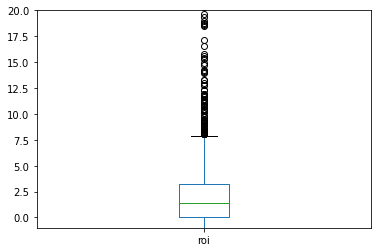

In [453]:
movies_df['roi'].plot(kind='box', ylim=(-1,20))

INTERESTING FACT: 36% of movies do not make any profit when using all data in tn_movie_budgets and 28% when using the tn_movie_budgets when joined with other tables

### Calculating Outliers

Outliers in ROI really skew the data as can be seen by the difference in a median of 1.19 and a mean of 2.8. This means outliers need to be taken out to have a realistic view of ROI. I will use the 1.5*IQR as the limit for outliers since median is more representative than the mean for this data set.

In [426]:
#calculate the IQR for ROI
roi_q25 = movies_df['roi'].quantile(q=0.25)
roi_q75 = movies_df['roi'].quantile(q=0.75)
roi_iqr = roi_q75 - roi_q25
roi_outlier_thresh = 1.5*roi_iqr
upper_thresh = roi_q75 + roi_outlier_thresh
lower_thresh = roi_q25 - roi_outlier_thresh

In [461]:
movies_df.loc[movies_df['roi'] > upper_thresh].sort_values('roi', ascending=False).head(20)

,tconst,original_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes,roi
904,tt2309260,The Gallows,2015,81.0,"Horror,Mystery,Thriller",2015-07-10,The Gallows,100000,22764410,41656474,4.2,17763,415.564740
477,tt1560985,The Devil Inside,2012,83.0,Horror,2012-01-06,The Devil Inside,1000000,53262945,101759490,4.2,33522,100.759490
461,tt1536044,Paranormal Activity 2,2010,91.0,Horror,2010-10-20,Paranormal Activity 2,3000000,84752907,177512032,5.7,93122,58.170677
1317,tt5052448,Get Out,2017,104.0,"Horror,Mystery,Thriller",2017-02-24,Get Out,5000000,176040665,255367951,7.7,400474,50.073590
1310,tt4975722,Moonlight,2016,111.0,Drama,2016-10-21,Moonlight,1500000,27854931,65245512,7.4,227964,42.497008
772,tt1991245,Chernobyl Diaries,2012,86.0,"Horror,Mystery,Thriller",2012-05-25,Chernobyl Diaries,1000000,18119640,42411721,5.0,60304,41.411721
661,tt1778304,Paranormal Activity 3,2011,83.0,"Horror,Mystery,Thriller",2011-10-21,Paranormal Activity 3,5000000,104028807,207039844,5.8,85689,40.407969
1113,tt3322940,Annabelle,2014,99.0,"Horror,Mystery,Thriller",2014-10-03,Annabelle,6500000,84273813,256862920,5.4,122039,38.517372
299,tt1320244,The Last Exorcism,2010,87.0,"Drama,Horror,Thriller",2010-08-27,The Last Exorcism,1800000,41034350,70165900,5.6,45815,37.981056
1319,tt5074352,Dangal,2016,161.0,"Action,Biography,Drama",2016-12-21,Dangal,9500000,12391761,294654618,8.5,123638,30.016276


In [ ]:
tn_movie_budgets['roi'].plot(kind='box', ylim=(-1,10))

In [ ]:
tn_movie_budgets.loc[tn_movie_budgets['roi'] >= 3.5].count()/len(tn_movie_budgets)

Question: Does how much you spend influence how successful a movie will be?
<br> 
Answer: According to the correlation between production_budget and roi is negative, therefore, how much you spend on a movie is not a good indicator of success. 

In [ ]:
tn_movie_budgets.corr()

In [ ]:
pd.plotting.scatter_matrix(tn_movie_budgets, figsize=(18,18));

#### Removing Outliers for financial columns (production_cost, domestic_gross, worldwide_gross)